# Analysis from ENEM microdata for 2021

## Import libs

In [1]:
import pandas as pd
from apyori import apriori

## Read microdata file

In [2]:
data = pd.read_csv('../microdata/microdata-enem-2021.csv', sep=';', encoding='ISO-8859-1')
data

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389827,210053249138,2021,7,F,1,3,1,1,0,1,...,A,A,A,B,A,A,B,A,A,B
3389828,210053776013,2021,7,F,1,1,1,1,5,1,...,B,A,B,C,A,A,E,B,B,B
3389829,210052441508,2021,13,F,1,3,1,1,15,1,...,B,A,A,A,A,A,B,A,B,B
3389830,210051139675,2021,7,F,1,1,1,1,4,1,...,B,A,B,B,A,B,E,A,C,B


## Select only columns of interest

In [3]:
interest_columns = [
    'TP_SEXO',
    'TP_ESTADO_CIVIL',
    'TP_COR_RACA',
    'TP_FAIXA_ETARIA',
    'TP_ST_CONCLUSAO',
    'TP_ESCOLA',
    'TP_DEPENDENCIA_ADM_ESC',
    'SG_UF_PROVA',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_MT',
    'NU_NOTA_REDACAO',
    'Q001',
    'Q002',
    'Q006',
    'Q022',
    'Q024',
    'Q025'
]

interest_data = data[interest_columns]

interest_data.head()

,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q022,Q024,Q025
0,F,1,1,5,1,1,NaN,MG,NaN,574.6,472.6,NaN,760.0,F,F,D,B,B,B
1,M,1,1,12,1,1,NaN,AL,505.9,551.8,498.3,461.5,560.0,B,B,B,C,A,A
2,F,3,1,13,1,1,NaN,SP,NaN,NaN,NaN,NaN,NaN,B,C,C,C,B,B
3,M,1,3,3,2,2,2.0,CE,580.7,678.9,638.9,659.5,780.0,B,B,B,B,B,B
4,F,1,3,2,2,2,2.0,CE,497.7,532.4,457.6,582.6,780.0,D,E,C,E,B,B


### Check count for valid values

In [4]:
interest_data.count()

TP_SEXO                   3389832
TP_ESTADO_CIVIL           3389832
TP_COR_RACA               3389832
TP_FAIXA_ETARIA           3389832
TP_ST_CONCLUSAO           3389832
TP_ESCOLA                 3389832
TP_DEPENDENCIA_ADM_ESC     813806
SG_UF_PROVA               3389832
NU_NOTA_CN                2245844
NU_NOTA_CH                2378379
NU_NOTA_LC                2378379
NU_NOTA_MT                2245844
NU_NOTA_REDACAO           2378379
Q001                      3389830
Q002                      3389830
Q006                      3389830
Q022                      3389830
Q024                      3389830
Q025                      3389830
dtype: int64

## Translate some columns to better readability

In [5]:
%run '../scripts/attribute-dictionary.py'

interest_data = interest_data.fillna(value = {"TP_DEPENDENCIA_ADM_ESC": 0})
interest_data = interest_data.replace(dictionary_params)

interest_data.head()

,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q022,Q024,Q025
0,Feminino,Solteiro(a),Branco,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Sudeste,NaN,574.6,472.6,NaN,760.0,Pai Graduação completa,Mãe Graduação completa,Classe Social E,Tem celular,Tem computador,Tem internet em casa
1,Masculino,Solteiro(a),Branco,Entre 31 e 35 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Nordeste,505.9,551.8,498.3,461.5,560.0,Pai Fundamental I incompleto,Mãe Fundamental I incompleto,Classe Social E,Tem celular,Não tem computador,Não tem internet em casa
2,Feminino,Divorciado(a)/Desquitado(a)/Separado(a),Branco,Entre 36 e 40 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Sudeste,NaN,NaN,NaN,NaN,NaN,Pai Fundamental I incompleto,Mãe Fundamental II incompleto,Classe Social E,Tem celular,Tem computador,Tem internet em casa
3,Masculino,Solteiro(a),Pardo,Entre 17 e 25 anos,Estou cursando e concluirei o Ensino este ano,Pública,Estadual,Região Nordeste,580.7,678.9,638.9,659.5,780.0,Pai Fundamental I incompleto,Mãe Fundamental I incompleto,Classe Social E,Tem celular,Tem computador,Tem internet em casa
4,Feminino,Solteiro(a),Pardo,Entre 17 e 25 anos,Estou cursando e concluirei o Ensino este ano,Pública,Estadual,Região Nordeste,497.7,532.4,457.6,582.6,780.0,Pai Ensino médio incompleto,Mãe Ensino médio completo,Classe Social E,Tem celular,Tem computador,Tem internet em casa


## Remove nil values and creates a new column with the arithmetic average of the grades

In [6]:
interest_data = interest_data.query("NU_NOTA_CN.notnull() and NU_NOTA_CH.notnull() and NU_NOTA_LC.notnull() and NU_NOTA_MT.notnull() and NU_NOTA_REDACAO.notnull() and TP_ESTADO_CIVIL.notnull() and Q006.notnull() and Q022.notnull() and Q024.notnull() and Q025.notnull()")
interest_data["NU_NOTA_GERAL"] = interest_data[["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]].mean(axis=1)

interest_data.head()

,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q022,Q024,Q025,NU_NOTA_GERAL
1,Masculino,Solteiro(a),Branco,Entre 31 e 35 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Nordeste,505.9,551.8,498.3,461.5,560.0,Pai Fundamental I incompleto,Mãe Fundamental I incompleto,Classe Social E,Tem celular,Não tem computador,Não tem internet em casa,515.50
3,Masculino,Solteiro(a),Pardo,Entre 17 e 25 anos,Estou cursando e concluirei o Ensino este ano,Pública,Estadual,Região Nordeste,580.7,678.9,638.9,659.5,780.0,Pai Fundamental I incompleto,Mãe Fundamental I incompleto,Classe Social E,Tem celular,Tem computador,Tem internet em casa,667.60
4,Feminino,Solteiro(a),Pardo,Entre 17 e 25 anos,Estou cursando e concluirei o Ensino este ano,Pública,Estadual,Região Nordeste,497.7,532.4,457.6,582.6,780.0,Pai Ensino médio incompleto,Mãe Ensino médio completo,Classe Social E,Tem celular,Tem computador,Tem internet em casa,570.06
8,Feminino,Solteiro(a),Pardo,Entre 17 e 25 anos,Estou cursando e concluirei o Ensino este ano,Pública,Dependencia administrativa nao informada,Região Sudeste,487.4,476.5,450.7,493.4,520.0,Pai Fundamental I incompleto,Mãe Fundamental I incompleto,Classe Social E,Tem celular,Não tem computador,Tem internet em casa,485.60
9,Feminino,Solteiro(a),Pardo,Entre 17 e 25 anos,Estou cursando e concluirei o Ensino este ano,Pública,Dependencia administrativa nao informada,Região Nordeste,507.6,539.2,494.6,413.3,380.0,Pai Ensino médio incompleto,Mãe Ensino médio incompleto,Classe Social E,Tem celular,Não tem computador,Tem internet em casa,466.94


### Check count for valid values

In [7]:
interest_data.count()

TP_SEXO                   2238106
TP_ESTADO_CIVIL           2238106
TP_COR_RACA               2238106
TP_FAIXA_ETARIA           2238106
TP_ST_CONCLUSAO           2238106
TP_ESCOLA                 2238106
TP_DEPENDENCIA_ADM_ESC    2238106
SG_UF_PROVA               2238106
NU_NOTA_CN                2238106
NU_NOTA_CH                2238106
NU_NOTA_LC                2238106
NU_NOTA_MT                2238106
NU_NOTA_REDACAO           2238106
Q001                      2238106
Q002                      2238106
Q006                      2238106
Q022                      2238106
Q024                      2238106
Q025                      2238106
NU_NOTA_GERAL             2238106
dtype: int64

## Calculate Z-SCORE from NU_NOTA_GERAL

In [8]:
from scipy.stats import zscore

interest_data["Z_SCORE_NOTA"] = zscore(interest_data["NU_NOTA_GERAL"])
interest_data.head()

,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,...,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q022,Q024,Q025,NU_NOTA_GERAL,Z_SCORE_NOTA
1,Masculino,Solteiro(a),Branco,Entre 31 e 35 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Nordeste,505.9,551.8,...,461.5,560.0,Pai Fundamental I incompleto,Mãe Fundamental I incompleto,Classe Social E,Tem celular,Não tem computador,Não tem internet em casa,515.50,-0.225270
3,Masculino,Solteiro(a),Pardo,Entre 17 e 25 anos,Estou cursando e concluirei o Ensino este ano,Pública,Estadual,Região Nordeste,580.7,678.9,...,659.5,780.0,Pai Fundamental I incompleto,Mãe Fundamental I incompleto,Classe Social E,Tem celular,Tem computador,Tem internet em casa,667.60,1.484460
4,Feminino,Solteiro(a),Pardo,Entre 17 e 25 anos,Estou cursando e concluirei o Ensino este ano,Pública,Estadual,Região Nordeste,497.7,532.4,...,582.6,780.0,Pai Ensino médio incompleto,Mãe Ensino médio completo,Classe Social E,Tem celular,Tem computador,Tem internet em casa,570.06,0.388030
8,Feminino,Solteiro(a),Pardo,Entre 17 e 25 anos,Estou cursando e concluirei o Ensino este ano,Pública,Dependencia administrativa nao informada,Região Sudeste,487.4,476.5,...,493.4,520.0,Pai Fundamental I incompleto,Mãe Fundamental I incompleto,Classe Social E,Tem celular,Não tem computador,Tem internet em casa,485.60,-0.561371
9,Feminino,Solteiro(a),Pardo,Entre 17 e 25 anos,Estou cursando e concluirei o Ensino este ano,Pública,Dependencia administrativa nao informada,Região Nordeste,507.6,539.2,...,413.3,380.0,Pai Ensino médio incompleto,Mãe Ensino médio incompleto,Classe Social E,Tem celular,Não tem computador,Tem internet em casa,466.94,-0.771125


### Z-SCORE mínimo

In [9]:
interest_data["Z_SCORE_NOTA"].min()

-6.019917348317704

### Z-SCORE máximo

In [10]:
interest_data["Z_SCORE_NOTA"].max()

3.677320823466754

## Create a label for grade based on z-score

In [11]:
NOTA_GERAL_LABELS = [
  "NOTA: MUITO ABAIXO DA MÉDIA",
  "NOTA: ABAIXO DA MÉDIA",
  "NOTA: MÉDIA",
  "NOTA: ACIMA DA MÉDIA",
  "NOTA: MUITO ACIMA DA MÉDIA",
]

interest_data["CLASSIFICACAO_NOTA"] = pd.cut(interest_data["Z_SCORE_NOTA"], bins=[-10, -2, -1, 1, 2, 10], labels=NOTA_GERAL_LABELS)

interest_data.head()

,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q022,Q024,Q025,NU_NOTA_GERAL,Z_SCORE_NOTA,CLASSIFICACAO_NOTA
1,Masculino,Solteiro(a),Branco,Entre 31 e 35 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Nordeste,505.9,551.8,...,560.0,Pai Fundamental I incompleto,Mãe Fundamental I incompleto,Classe Social E,Tem celular,Não tem computador,Não tem internet em casa,515.50,-0.225270,NOTA: MÉDIA
3,Masculino,Solteiro(a),Pardo,Entre 17 e 25 anos,Estou cursando e concluirei o Ensino este ano,Pública,Estadual,Região Nordeste,580.7,678.9,...,780.0,Pai Fundamental I incompleto,Mãe Fundamental I incompleto,Classe Social E,Tem celular,Tem computador,Tem internet em casa,667.60,1.484460,NOTA: ACIMA DA MÉDIA
4,Feminino,Solteiro(a),Pardo,Entre 17 e 25 anos,Estou cursando e concluirei o Ensino este ano,Pública,Estadual,Região Nordeste,497.7,532.4,...,780.0,Pai Ensino médio incompleto,Mãe Ensino médio completo,Classe Social E,Tem celular,Tem computador,Tem internet em casa,570.06,0.388030,NOTA: MÉDIA
8,Feminino,Solteiro(a),Pardo,Entre 17 e 25 anos,Estou cursando e concluirei o Ensino este ano,Pública,Dependencia administrativa nao informada,Região Sudeste,487.4,476.5,...,520.0,Pai Fundamental I incompleto,Mãe Fundamental I incompleto,Classe Social E,Tem celular,Não tem computador,Tem internet em casa,485.60,-0.561371,NOTA: MÉDIA
9,Feminino,Solteiro(a),Pardo,Entre 17 e 25 anos,Estou cursando e concluirei o Ensino este ano,Pública,Dependencia administrativa nao informada,Região Nordeste,507.6,539.2,...,380.0,Pai Ensino médio incompleto,Mãe Ensino médio incompleto,Classe Social E,Tem celular,Não tem computador,Tem internet em casa,466.94,-0.771125,NOTA: MÉDIA


## Check for uniqueness of all values to check if all of them was translated

In [12]:
interest_data['TP_SEXO'].unique()

array(['Masculino', 'Feminino'], dtype=object)

In [13]:
interest_data['TP_ESTADO_CIVIL'].unique()

array(['Solteiro(a)', 'Casado(a) ou mora com companheiro(a)',
       'Divorciado(a)/Desquitado(a)/Separado(a)',
       'Estado civil: Não informado', 'Viúvo(a)'], dtype=object)

In [14]:
interest_data['TP_COR_RACA'].unique()

array(['Branco', 'Pardo', 'Preto', 'Amarelo', 'Indígena',
       'Cor/Raça Não Declarado', 6], dtype=object)

In [15]:
interest_data['TP_FAIXA_ETARIA'].unique()

array(['Entre 31 e 35 anos', 'Entre 17 e 25 anos', 'Entre 26 e 30 anos',
       'Entre 36 e 40 anos', 'Menor de 17 anos', 'Entre 41 e 45 anos',
       'Entre 51 e 55 anos', 'Entre 46 e 50 anos', 'Entre 56 e 60 anos',
       'Entre 61 e 65 anos', 'Entre 66 e 70 anos', 'Maior de 70 anos'],
      dtype=object)

In [16]:
interest_data['TP_ST_CONCLUSAO'].unique()

array(['Já concluí o Ensino Médio',
       'Estou cursando e concluirei o Ensino este ano',
       'Estou cursando e concluirei o Ensino Médio após este ano',
       'Não concluí e não estou cursando o Ensino Médio'], dtype=object)

In [17]:
interest_data['TP_ESCOLA'].unique()

array(['Não Respondeu', 'Pública', 'Privada'], dtype=object)

In [18]:
interest_data['TP_DEPENDENCIA_ADM_ESC'].unique()

array(['Dependencia administrativa nao informada', 'Estadual', 'Federal',
       'Privada', 'Municipal'], dtype=object)

In [19]:
interest_data['SG_UF_PROVA'].unique()

array(['Região Nordeste', 'Região Sudeste', 'Região Centro-Oeste',
       'Região Norte', 'Região Sul'], dtype=object)

In [20]:
interest_data['Q001'].unique()

array(['Pai Fundamental I incompleto', 'Pai Ensino médio incompleto',
       'Pai Ensino médio completo', 'Pai Fundamental II incompleto',
       'Pai Pós-graduação completa', 'Não sei a escolaridade do meu pai',
       'Pai Graduação completa', 'Pai nunca estudou'], dtype=object)

In [21]:
interest_data['Q002'].unique()

array(['Mãe Fundamental I incompleto', 'Mãe Ensino médio completo',
       'Mãe Ensino médio incompleto', 'Mãe Fundamental II incompleto',
       'Mãe Graduação completa', 'Mãe Pós-graduação completa',
       'Mãe nunca estudou', 'Não sei a escolaridade da minha mãe'],
      dtype=object)

In [22]:
interest_data['Q006'].unique()

array(['Classe Social E', 'Classe Social D', 'Classe Social C',
       'Classe Social B', 'Classe Social A'], dtype=object)

In [23]:
interest_data['Q022'].unique()

array(['Tem celular', 'Não tem celular'], dtype=object)

In [24]:
interest_data['Q024'].unique()

array(['Não tem computador', 'Tem computador'], dtype=object)

In [25]:
interest_data['Q025'].unique()

array(['Não tem internet em casa', 'Tem internet em casa'], dtype=object)

In [26]:
interest_data['CLASSIFICACAO_NOTA'].unique()

['NOTA: MÉDIA', 'NOTA: ACIMA DA MÉDIA', 'NOTA: MUITO ACIMA DA MÉDIA', 'NOTA: ABAIXO DA MÉDIA', 'NOTA: MUITO ABAIXO DA MÉDIA']
Categories (5, object): ['NOTA: MUITO ABAIXO DA MÉDIA' < 'NOTA: ABAIXO DA MÉDIA' < 'NOTA: MÉDIA' < 'NOTA: ACIMA DA MÉDIA' < 'NOTA: MUITO ACIMA DA MÉDIA']

## Generate histograms by grade z-score

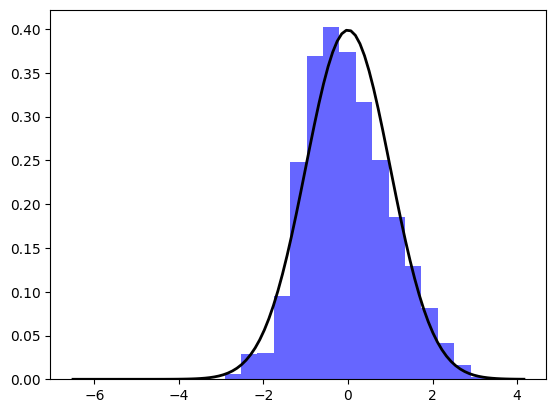

In [27]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

data = interest_data['Z_SCORE_NOTA'].to_numpy()

mu, std = norm.fit(data) 
  
# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
  
plt.show()

## Generate histograms by grade

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

data = interest_data['NU_NOTA_GERAL'].to_numpy()

mu, std = norm.fit(data) 
  
# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
  
plt.show()

## Filter by grades far above or far below average

In [28]:
filtered_interest_data = interest_data.query("Z_SCORE_NOTA > 2.00 or Z_SCORE_NOTA < -2.00")
filtered_interest_data.count()

TP_SEXO                   110263
TP_ESTADO_CIVIL           110263
TP_COR_RACA               110263
TP_FAIXA_ETARIA           110263
TP_ST_CONCLUSAO           110263
TP_ESCOLA                 110263
TP_DEPENDENCIA_ADM_ESC    110263
SG_UF_PROVA               110263
NU_NOTA_CN                110263
NU_NOTA_CH                110263
NU_NOTA_LC                110263
NU_NOTA_MT                110263
NU_NOTA_REDACAO           110263
Q001                      110263
Q002                      110263
Q006                      110263
Q022                      110263
Q024                      110263
Q025                      110263
NU_NOTA_GERAL             110263
Z_SCORE_NOTA              110263
CLASSIFICACAO_NOTA        110263
dtype: int64

In [29]:
analysis_interest_columns = [
    'TP_SEXO',
    'TP_ESTADO_CIVIL',
    'TP_COR_RACA',
    'TP_FAIXA_ETARIA',
    'TP_ST_CONCLUSAO',
    'TP_ESCOLA',
    'TP_DEPENDENCIA_ADM_ESC',
    'SG_UF_PROVA',
    'CLASSIFICACAO_NOTA',
    'Q001',
    'Q002',
    'Q006',
    'Q022',
    'Q024',
    'Q025'
]

analysis_interest_data = filtered_interest_data[analysis_interest_columns]

## Save a CSV file with the analysis interest data

In [30]:
import os  

os.makedirs('analysis_interest_data', exist_ok=True)  
analysis_interest_data.to_csv('analysis_interest_data/analysis-interest-data-2021.csv')

analysis_file_data = pd.read_csv('analysis_interest_data/analysis-interest-data-2021.csv', sep=',', encoding='UTF-8')
analysis_file_data.head()

,Unnamed: 0,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_FAIXA_ETARIA,TP_ST_CONCLUSAO,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,SG_UF_PROVA,CLASSIFICACAO_NOTA,Q001,Q002,Q006,Q022,Q024,Q025
0,10,Feminino,Solteiro(a),Pardo,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Centro-Oeste,NOTA: MUITO ACIMA DA MÉDIA,Pai Ensino médio completo,Mãe Ensino médio completo,Classe Social E,Tem celular,Tem computador,Tem internet em casa
1,56,Masculino,Solteiro(a),Branco,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Sudeste,NOTA: MUITO ACIMA DA MÉDIA,Pai Ensino médio completo,Mãe Graduação completa,Classe Social D,Tem celular,Tem computador,Tem internet em casa
2,65,Feminino,Solteiro(a),Preto,Entre 17 e 25 anos,Estou cursando e concluirei o Ensino este ano,Pública,Dependencia administrativa nao informada,Região Centro-Oeste,NOTA: MUITO ABAIXO DA MÉDIA,Pai Fundamental I incompleto,Mãe Ensino médio completo,Classe Social D,Tem celular,Não tem computador,Tem internet em casa
3,79,Feminino,Solteiro(a),Pardo,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Sudeste,NOTA: MUITO ACIMA DA MÉDIA,Pai Ensino médio incompleto,Mãe Pós-graduação completa,Classe Social D,Tem celular,Tem computador,Tem internet em casa
4,105,Masculino,Solteiro(a),Pardo,Entre 17 e 25 anos,Já concluí o Ensino Médio,Não Respondeu,Dependencia administrativa nao informada,Região Sudeste,NOTA: MUITO ACIMA DA MÉDIA,Pai Fundamental II incompleto,Mãe Fundamental II incompleto,Classe Social E,Tem celular,Não tem computador,Tem internet em casa


## Convert table to transactions

In [31]:
transactions = analysis_interest_data.to_numpy()
transactions

array([['Feminino', 'Solteiro(a)', 'Pardo', ..., 'Tem celular',
        'Tem computador', 'Tem internet em casa'],
       ['Masculino', 'Solteiro(a)', 'Branco', ..., 'Tem celular',
        'Tem computador', 'Tem internet em casa'],
       ['Feminino', 'Solteiro(a)', 'Preto', ..., 'Tem celular',
        'Não tem computador', 'Tem internet em casa'],
       ...,
       ['Feminino', 'Solteiro(a)', 'Preto', ..., 'Tem celular',
        'Tem computador', 'Tem internet em casa'],
       ['Masculino', 'Estado civil: Não informado', 'Preto', ...,
        'Tem celular', 'Tem computador', 'Tem internet em casa'],
       ['Feminino', 'Solteiro(a)', 'Branco', ..., 'Tem celular',
        'Não tem computador', 'Tem internet em casa']], dtype=object)

## Create apriori rules

In [32]:
%run '../scripts/apriori-params-setup.py'
rules = apriori(transactions, min_support=support, min_confidence=confidence)
rules

<generator object apriori at 0x2a6cd0900>

## Run apriori

In [33]:
from datetime import datetime

initial_time = datetime.now()

results = pd.DataFrame(list(rules))

execution_time = datetime.now() - initial_time
print("Time to run apriori: " + str(execution_time))

Time to run apriori: 0:12:10.932197


In [34]:
results

,items,support,ordered_statistics
0,(Branco),0.540798,"[((), (Branco), 0.5407979104504684, 1.0)]"
1,(Dependencia administrativa nao informada),0.706175,"[((), (Dependencia administrativa nao informad..."
2,(Entre 17 e 25 anos),0.842114,"[((), (Entre 17 e 25 anos), 0.8421138550556397..."
3,(Feminino),0.548724,"[((), (Feminino), 0.5487244134478474, 1.0)]"
4,(Já concluí o Ensino Médio),0.534431,"[((), (Já concluí o Ensino Médio), 0.534431314..."
...,...,...,...
2361,"(NOTA: MUITO ACIMA DA MÉDIA, Tem internet em c...",0.348657,"[((Já concluí o Ensino Médio), (NOTA: MUITO AC..."
2362,"(Feminino, NOTA: MUITO ACIMA DA MÉDIA, Tem int...",0.218441,"[((Feminino, Dependencia administrativa nao in..."
2363,"(Feminino, NOTA: MUITO ACIMA DA MÉDIA, Tem int...",0.205563,"[((Feminino, Já concluí o Ensino Médio), (NOTA..."
2364,"(NOTA: MUITO ACIMA DA MÉDIA, Tem internet em c...",0.242656,"[((Dependencia administrativa nao informada, B..."


## Extract results to a new table

In [35]:
%run '../scripts/extractor.py'

organized_rules = extractor(results)
organized_rules

,items_base,items_add,support,confidence,lift
0,[],[Branco],0.540798,0.540798,1.0
1,[],[Dependencia administrativa nao informada],0.706175,0.706175,1.0
2,[],[Entre 17 e 25 anos],0.842114,0.842114,1.0
3,[],[Feminino],0.548724,0.548724,1.0
4,[],[Já concluí o Ensino Médio],0.534431,0.534431,1.0
...,...,...,...,...,...
81284,"[Feminino, Tem internet em casa, Não Respondeu...",[NOTA: MUITO ACIMA DA MÉDIA],0.205563,0.959245,1.485147
81285,"[Feminino, NOTA: MUITO ACIMA DA MÉDIA, Tem int...",[Já concluí o Ensino Médio],0.205563,0.973751,1.822032
81286,"[NOTA: MUITO ACIMA DA MÉDIA, Tem internet em c...",[Feminino],0.205563,0.589585,1.074464
81287,"[Feminino, NOTA: MUITO ACIMA DA MÉDIA, Tem int...",[Entre 17 e 25 anos],0.205563,0.941045,1.117479


In [36]:
rules_count = len(organized_rules.index)
print("Count of itemsets: " + str(len(results.index)))
print("Count of association rules for support " + str((support *100)) + "% and confidence " + str((confidence * 100)) + "%: " + str(rules_count))

Count of association rules for support 20.0% and confidence 50.0%: 81289


## Save results to a new CSV file

In [37]:
import os  

os.makedirs('results', exist_ok=True)  
organized_rules.to_csv('results/organized-associations-2021.csv')  